<a href="https://colab.research.google.com/github/Kushagr-25/pred_anal_stat/blob/assignment-3/text_classification_topsis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('dataset.csv')
data.head(5)

,Model,Accuracy,Precision,Recall,F1 Score,Training Time(hrs),Inference Time(ms/sentence)
0,BERT,0.85,0.86,0.84,0.85,24,2.0
1,RoBERTa,0.87,0.88,0.86,0.87,28,2.5
2,XLNet,0.86,0.87,0.85,0.86,36,3.0
3,ALBERT,0.84,0.85,0.83,0.84,20,1.5
4,DistilBERT,0.82,0.83,0.81,0.82,12,1.0


In [3]:
# Extract relevant columns
accuracy = data["Accuracy"].values
f1_score = data["F1 Score"].values
precision = data["Precision"].values
recall = data["Recall"].values
training_time = data["Training Time(hrs)"].values
inference_time = data["Inference Time(ms/sentence)"].values

In [4]:
# Weights for each parameter
weights = np.array([0.15 ,0.15, 0.15, 0.2, 0.2, 0.15])

# Normalize the matrix
normalized_matrix = np.column_stack(
    [
        accuracy / np.max(accuracy),
        f1_score / np.max(f1_score),
        precision / np.max(precision),
        recall / np.max(recall),
        training_time / np.max(training_time),
        inference_time / np.max(inference_time)
    ]
)

In [5]:
# Calculate the weighted normalized decision matrix
weighted_normalized_matrix = normalized_matrix * weights

# Ideal and Negative Ideal solutions
ideal_solution = np.max(weighted_normalized_matrix, axis=0)
negative_ideal_solution = np.min(weighted_normalized_matrix, axis=0)

# Calculate the separation measures
distance_to_ideal = np.sqrt(
    np.sum((weighted_normalized_matrix - ideal_solution) ** 2, axis=1)
)
distance_to_negative_ideal = np.sqrt(
    np.sum((weighted_normalized_matrix - negative_ideal_solution) ** 2, axis=1)
)

# Calculate the TOPSIS scores
topsis_scores = distance_to_negative_ideal / (
    distance_to_ideal + distance_to_negative_ideal
)

# Rank the models based on TOPSIS scores
data["TOPSIS_Score"] = topsis_scores
data["Rank"] = data["TOPSIS_Score"].rank(ascending=False)

In [6]:
# Print the results
print("Model Ranking:")
print(data[["Model", "TOPSIS_Score", "Rank"]].sort_values(by="Rank"))

data.to_csv("result.csv", index=False)

Model Ranking:
        Model  TOPSIS_Score  Rank
6          T5      1.000000   1.0
2       XLNet      0.767313   2.0
5     Electra      0.652329   3.0
1     RoBERTa      0.547371   4.0
0        BERT      0.393896   5.0
3      ALBERT      0.245244   6.0
4  DistilBERT      0.000000   7.0


In [7]:
import matplotlib.pyplot as plt

# Import result
dataset = pd.read_csv("result.csv")

In [8]:
# Display the table
print("Model Ranking Table:")
print(dataset[["Model","Accuracy","Precision","Recall","F1 Score","Training Time(hrs)","Inference Time(ms/sentence)","Rank"]].sort_values(by="Rank"))
# Bar chart
labels = dataset["Model"]
num_models = len(labels)

Model Ranking Table:
        Model  Accuracy  Precision  Recall  F1 Score  Training Time(hrs)  \
6          T5      0.88       0.89    0.87      0.88                  40   
2       XLNet      0.86       0.87    0.85      0.86                  36   
5     Electra      0.86       0.87    0.85      0.86                  30   
1     RoBERTa      0.87       0.88    0.86      0.87                  28   
0        BERT      0.85       0.86    0.84      0.85                  24   
3      ALBERT      0.84       0.85    0.83      0.84                  20   
4  DistilBERT      0.82       0.83    0.81      0.82                  12   

   Inference Time(ms/sentence)  Rank  
6                          4.0   1.0  
2                          3.0   2.0  
5                          3.0   3.0  
1                          2.5   4.0  
0                          2.0   5.0  
3                          1.5   6.0  
4                          1.0   7.0  


In [9]:
# Parameters for bar chart
accuracy = dataset["Accuracy"]
f1_score = dataset["F1 Score"]
precision = dataset["Precision"]
recall = dataset["Recall"]
training_time = dataset["Training Time(hrs)"]
inference_time = dataset["Inference Time(ms/sentence)"]
ranks = dataset["Rank"]

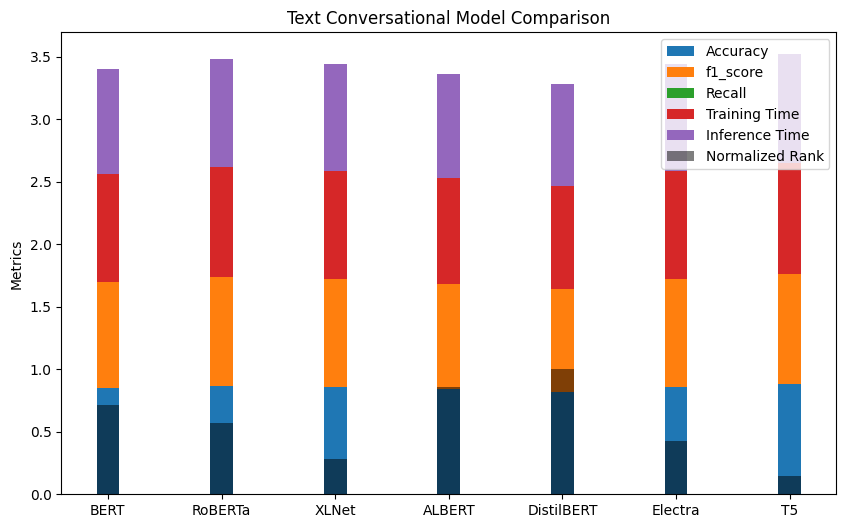

In [10]:
# Normalize ranks to a scale of 0 to 1 for better comparison
normalized_ranks = ranks / np.max(ranks)

# Plot the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.2
index = range(num_models)

ax.bar(index, accuracy, width=bar_width, label="Accuracy")
ax.bar(
    index,
    f1_score,
    width=bar_width,
    label="f1_score",
    bottom=accuracy,
)
ax.bar(
    index,
    recall,
    width=bar_width,
    label="Recall",
    bottom=accuracy + f1_score + precision,
)
ax.bar(
    index,
    precision,
    width=bar_width,
    label="Training Time",
    bottom=accuracy + f1_score,
)
ax.bar(
    index,
    recall,
    width=bar_width,
    label="Inference Time",
    bottom=accuracy + f1_score + precision,
)
ax.bar(
    index,
    normalized_ranks,
    width=bar_width,
    label="Normalized Rank",
    color="black",
    alpha=0.5,
)

ax.set_xticks(index)
ax.set_xticklabels(labels)
ax.set_ylabel("Metrics")
ax.set_title("Text Conversational Model Comparison")

ax.legend(loc = 'upper right')
plt.savefig("BarChart.png")
plt.show()